# Import data & load dataset

In [57]:
# Packages imports
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.stats.api as sms
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil

%matplotlib inline

In [58]:
!wget -O real gdp indonesia.csv 'https://drive.google.com/uc?export=download&id=1EWiNraMRodQyPneeCwur0smSZ21C3BJn'

# Load the dataset
df = pd.read_csv('real gdp indonesia.csv')

#Menampilkan 5 baris awal
df.head()

--2024-11-29 23:32:14--  http://gdp/
Resolving gdp (gdp)... failed: Name or service not known.
wget: unable to resolve host address ‘gdp’
--2024-11-29 23:32:14--  http://indonesia.csv/
Resolving indonesia.csv (indonesia.csv)... failed: Name or service not known.
wget: unable to resolve host address ‘indonesia.csv’
--2024-11-29 23:32:14--  https://drive.google.com/uc?export=download&id=1EWiNraMRodQyPneeCwur0smSZ21C3BJn
Resolving drive.google.com (drive.google.com)... 173.194.215.100, 173.194.215.113, 173.194.215.101, ...
Connecting to drive.google.com (drive.google.com)|173.194.215.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1EWiNraMRodQyPneeCwur0smSZ21C3BJn&export=download [following]
--2024-11-29 23:32:14--  https://drive.usercontent.google.com/download?id=1EWiNraMRodQyPneeCwur0smSZ21C3BJn&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 108.177.12.132, 2

,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,ACTION,REF_AREA,Reference area,FREQ,Frequency of observation,MEASURE,Measure,...,UNIT_MULT,Unit multiplier,PRICE_BASE,Price base,BASE_PER,Base period,TIMELINESS,Timeliness,DECIMALS,Decimals
0,DATAFLOW,OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1),Green Growth,I,IDN,Indonesia,A,Annual,GDP_R,Real GDP,...,6,Millions,Q,Constant prices,2015,NaN,1,"1 year lag, timely",2,Two
1,DATAFLOW,OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1),Green Growth,I,IDN,Indonesia,A,Annual,GDP_R,Real GDP,...,6,Millions,Q,Constant prices,2015,NaN,1,"1 year lag, timely",2,Two
2,DATAFLOW,OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1),Green Growth,I,IDN,Indonesia,A,Annual,GDP_R,Real GDP,...,6,Millions,Q,Constant prices,2015,NaN,1,"1 year lag, timely",2,Two
3,DATAFLOW,OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1),Green Growth,I,IDN,Indonesia,A,Annual,GDP_R,Real GDP,...,6,Millions,Q,Constant prices,2015,NaN,1,"1 year lag, timely",2,Two
4,DATAFLOW,OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1),Green Growth,I,IDN,Indonesia,A,Annual,GDP_R,Real GDP,...,6,Millions,Q,Constant prices,2015,NaN,1,"1 year lag, timely",2,Two


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   STRUCTURE                 34 non-null     object 
 1   STRUCTURE_ID              34 non-null     object 
 2   STRUCTURE_NAME            34 non-null     object 
 3   ACTION                    34 non-null     object 
 4   REF_AREA                  34 non-null     object 
 5   Reference area            34 non-null     object 
 6   FREQ                      34 non-null     object 
 7   Frequency of observation  34 non-null     object 
 8   MEASURE                   34 non-null     object 
 9   Measure                   34 non-null     object 
 10  UNIT_MEASURE              34 non-null     object 
 11  Unit of measure           34 non-null     object 
 12  ACTIVITY                  34 non-null     object 
 13  Economic activity         34 non-null     object 
 14  TIME_PERIOD 

In [60]:
# ganti nama kolom
df = df.rename(columns={
    'REF_AREA': 'Country_Region',
    'MEASURE': 'Measure_Code',
    'TIME_PERIOD': 'Year',
    'OBS_VALUE': 'Value_Measure',
})
df.head()

,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,ACTION,Country_Region,Reference area,FREQ,Frequency of observation,Measure_Code,Measure,...,UNIT_MULT,Unit multiplier,PRICE_BASE,Price base,BASE_PER,Base period,TIMELINESS,Timeliness,DECIMALS,Decimals
0,DATAFLOW,OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1),Green Growth,I,IDN,Indonesia,A,Annual,GDP_R,Real GDP,...,6,Millions,Q,Constant prices,2015,NaN,1,"1 year lag, timely",2,Two
1,DATAFLOW,OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1),Green Growth,I,IDN,Indonesia,A,Annual,GDP_R,Real GDP,...,6,Millions,Q,Constant prices,2015,NaN,1,"1 year lag, timely",2,Two
2,DATAFLOW,OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1),Green Growth,I,IDN,Indonesia,A,Annual,GDP_R,Real GDP,...,6,Millions,Q,Constant prices,2015,NaN,1,"1 year lag, timely",2,Two
3,DATAFLOW,OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1),Green Growth,I,IDN,Indonesia,A,Annual,GDP_R,Real GDP,...,6,Millions,Q,Constant prices,2015,NaN,1,"1 year lag, timely",2,Two
4,DATAFLOW,OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1),Green Growth,I,IDN,Indonesia,A,Annual,GDP_R,Real GDP,...,6,Millions,Q,Constant prices,2015,NaN,1,"1 year lag, timely",2,Two


In [61]:
selected = df[['Country_Region','Year', 'Value_Measure', 'Measure_Code']]
selected

,Country_Region,Year,Value_Measure,Measure_Code
0,IDN,2014,2503140.50,GDP_R
1,IDN,2015,2625201.75,GDP_R
2,IDN,2016,2757330.00,GDP_R
3,IDN,2017,2897120.75,GDP_R
4,IDN,2018,3047026.25,GDP_R
5,IDN,2019,3199965.00,GDP_R
6,IDN,2020,3133869.50,GDP_R
7,IDN,2021,3249913.00,GDP_R
8,IDN,2022,3422400.00,GDP_R
9,IDN,2023,3595166.00,GDP_R


In [62]:
# Melakukan pivot
df_pivot = selected.pivot_table(
    index=['Country_Region', 'Year'],
    columns='Measure_Code',
    values='Value_Measure',
    aggfunc=lambda x: x.iloc[0]  # Mengambil nilai pertama dari data asli
)

# Mengatur nama kolom
df_pivot.columns.name = None  # Menghapus nama kolom yang dihasilkan oleh pivot_table
df_pivot.reset_index(inplace=True)  # Mengubah index menjadi kolom biasa

df_pivot

,Country_Region,Year,GDP_R
0,IDN,1990,1680110.12
1,IDN,1991,1540211.25
2,IDN,1992,1433530.00
3,IDN,1993,1199877.62
4,IDN,1994,1290347.62
5,IDN,1995,1159067.12
6,IDN,1996,1249682.88
7,IDN,1997,1308416.88
8,IDN,1998,1136664.25
9,IDN,1999,1145657.00


In [63]:
df_pivot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country_Region  34 non-null     object 
 1   Year            34 non-null     int64  
 2   GDP_R           34 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 944.0+ bytes


In [64]:
# Menjadikan 'year' sebagai index
df_pivot.set_index('Year', inplace=True)

# Menampilkan DataFrame
print(df_pivot)


     Country_Region       GDP_R
Year                           
1990            IDN  1680110.12
1991            IDN  1540211.25
1992            IDN  1433530.00
1993            IDN  1199877.62
1994            IDN  1290347.62
1995            IDN  1159067.12
1996            IDN  1249682.88
1997            IDN  1308416.88
1998            IDN  1136664.25
1999            IDN  1145657.00
2000            IDN  1202023.75
2001            IDN  1245819.12
2002            IDN  1301874.50
2003            IDN  1364108.88
2004            IDN  1432735.50
2005            IDN  1514294.88
2006            IDN  1597595.62
2007            IDN  1698963.38
2008            IDN  1801134.00
2009            IDN  1885819.00
2010            IDN  2006089.62
2011            IDN  2129861.00
2012            IDN  2258292.75
2013            IDN  2383792.00
2014            IDN  2503140.50
2015            IDN  2625201.75
2016            IDN  2757330.00
2017            IDN  2897120.75
2018            IDN  3047026.25
2019    

# Data Preparation

## cek mising value

In [65]:
df_pivot.isnull().sum()

,0
Country_Region,0
GDP_R,0


In [66]:
df_pivot.duplicated().sum()

0

## Cek Outlier

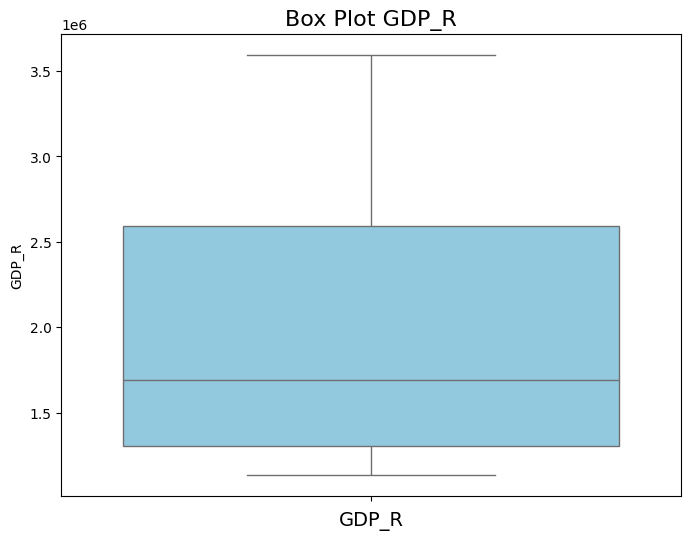

In [67]:
# Membuat box plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_pivot['GDP_R'], color="skyblue")

# Menambahkan label dan judul
plt.title("Box Plot GDP_R", fontsize=16)
plt.xlabel("GDP_R", fontsize=14)

# Menampilkan plot
plt.show()

# EDA

In [68]:
df_pivot.describe()

,GDP_R
count,3.400000e+01
mean,1.982268e+06
std,7.815439e+05
min,1.136664e+06
25%,1.303510e+06
50%,1.689537e+06
75%,2.594686e+06
max,3.595166e+06


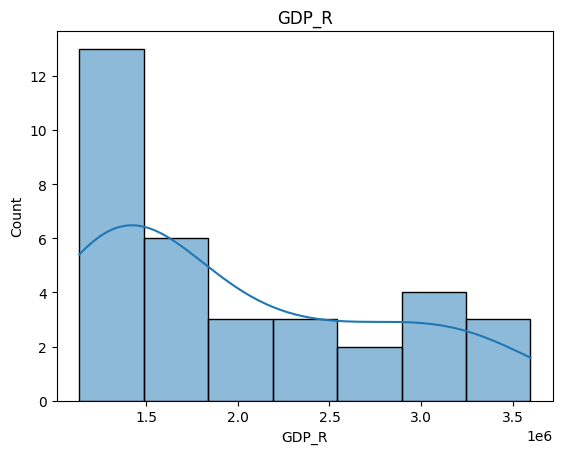

In [69]:
# Visualisasi distribusi untuk kolom 'GDP_R'
sns.histplot(df_pivot, x='GDP_R', kde=True)
plt.title('GDP_R')
plt.show()

In [70]:
#Import library
from scipy import stats
import pandas as pd

# Menghitung uji normalitas Shapiro-Wilk untuk setiap fitur kecuali dan 'Country_Region'
normality_results = {}

# Exclude 'Year' and 'Country_Region' columns from the normality test
for column in df_pivot.select_dtypes(include=['number']):
    stat, p_value = stats.shapiro(df_pivot[column])
    normality_results[column] = {'Statistic': stat, 'p-value': p_value}

# Menampilkan hasil uji normalitas
normality_df = pd.DataFrame(normality_results).T
normality_df['Normal'] = normality_df['p-value'] > 0.05
print(normality_df)

       Statistic   p-value  Normal
GDP_R   0.877031  0.001197   False


**Insight:**

**1. Statistik dan p-value:**
* **Statistik:** Nilai yang dihitung dari data yang menunjukkan seberapa jauh data tersebut menyimpang dari distribusi normal.
* **p-value:** Nilai yang menunjukkan probabilitas bahwa hasil yang diamati terjadi secara kebetulan jika hipotesis nol benar. Umumnya, p-value di bawah 0.05 atau 0.01 dianggap signifikan, yang menunjukkan bahwa data tidak mengikuti distribusi normal.

dari uji normalitas didapatkan bahwa varibel GDPR tidak memiliki distirbusi yang normal

# Machine Learning

##ARIMA (Without split data train)

In [71]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller

In [72]:
df_pivot.index

Index([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
      dtype='int64', name='Year')

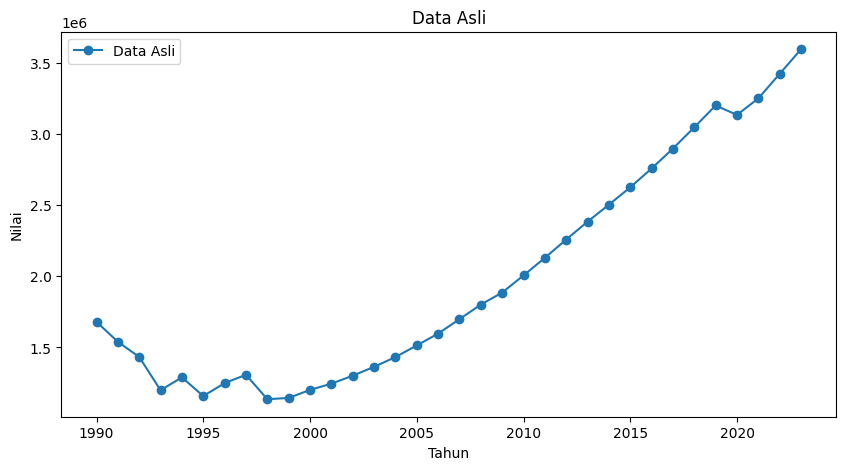

In [73]:
# Visualisasi awal data
plt.figure(figsize=(10, 5))
plt.plot(df_pivot.index, df_pivot['GDP_R'], marker='o', label='Data Asli')
plt.title('Data Asli')
plt.xlabel('Tahun')
plt.ylabel('Nilai')
plt.legend()
plt.show()

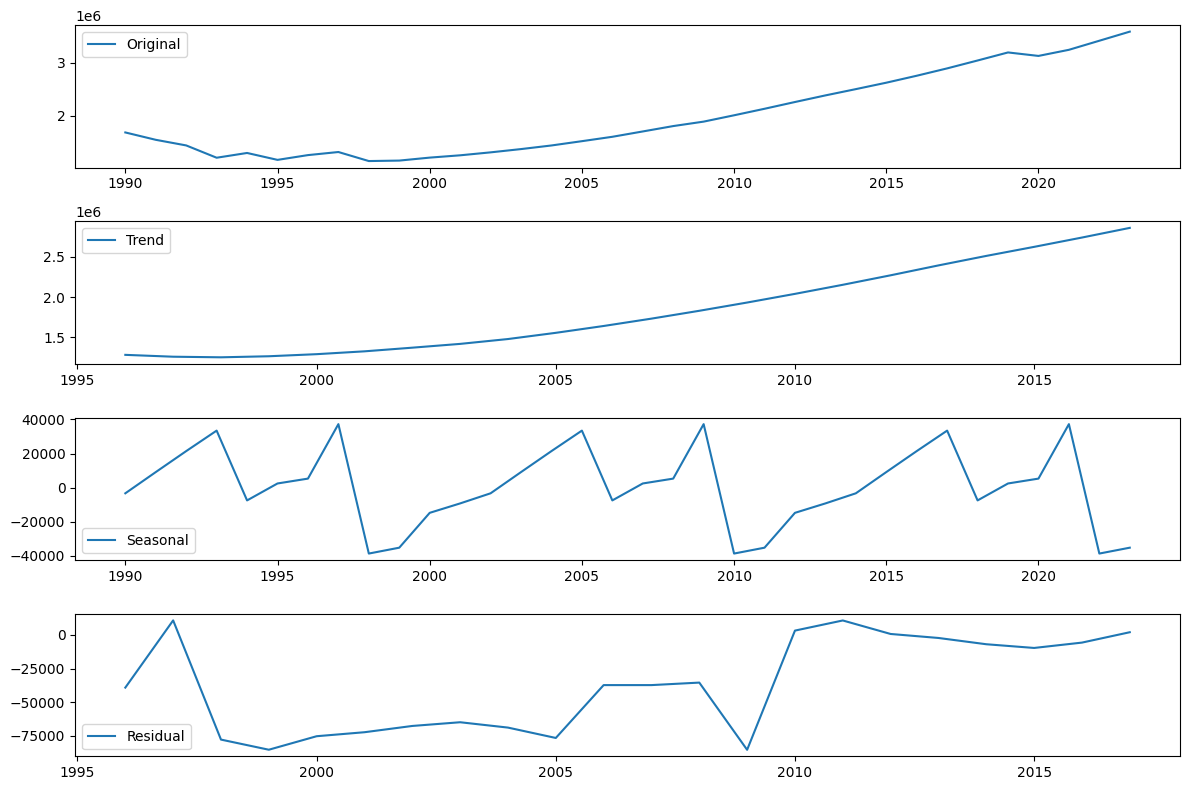

In [74]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Dekomposisi (mode 'additive' atau 'multiplicative' sesuai data)
decomposition = seasonal_decompose(df_pivot['GDP_R'], model='additive', period=12)  # Sesuaikan period dengan data

# Plot hasil dekomposisi
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(df_pivot['GDP_R'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

* Tren positif: GDP secara keseluruhan mengalami pertumbuhan stabil dalam jangka panjang.
* Polarisasi musiman: GDP memiliki pola musiman yang jelas, yang mungkin penting untuk analisis lebih lanjut, seperti perencanaan atau prediksi ekonomi.
* Noise (residual): Sisa variabilitas setelah tren dan musiman telah dihapus relatif kecil, menunjukkan bahwa data sebagian besar dapat dijelaskan oleh komponen utama (tren dan musiman).

In [75]:
# 1. Uji stasionaritas (ADF Test)
def check_stationarity(series):
    result = adfuller(series)
    print("Hasil Uji ADF:")
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    print(f"Critical Values: {result[4]}")
    if result[1] < 0.05:
        print("Data stasioner pada tingkat signifikansi 5%.")
    else:
        print("Data tidak stasioner pada tingkat signifikansi 5%.")

check_stationarity(df_pivot['GDP_R'])

Hasil Uji ADF:
ADF Statistic: 2.8163969262635367
p-value: 1.0
Critical Values: {'1%': -3.6461350877925254, '5%': -2.954126991123355, '10%': -2.6159676124885216}
Data tidak stasioner pada tingkat signifikansi 5%.


In [76]:
# 2. Differencing jika data tidak stasioner
df_diff = df_pivot['GDP_R'].diff().dropna()
check_stationarity(df_diff)

Hasil Uji ADF:
ADF Statistic: -3.8706569606408885
p-value: 0.002261728300812577
Critical Values: {'1%': -3.653519805908203, '5%': -2.9572185644531253, '10%': -2.6175881640625}
Data stasioner pada tingkat signifikansi 5%.


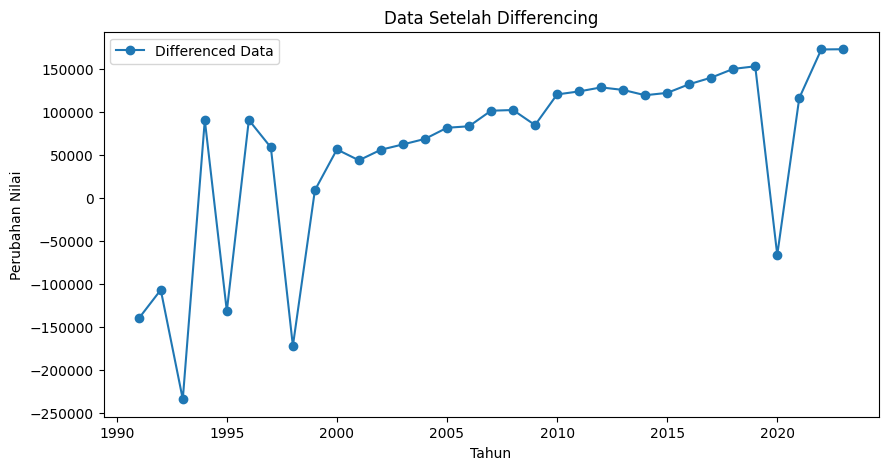

In [77]:
# Visualisasi differencing
plt.figure(figsize=(10, 5))
plt.plot(df_pivot.index[1:], df_diff, marker='o', label='Differenced Data')
plt.title('Data Setelah Differencing')
plt.xlabel('Tahun')
plt.ylabel('Perubahan Nilai')
plt.legend()
plt.show()

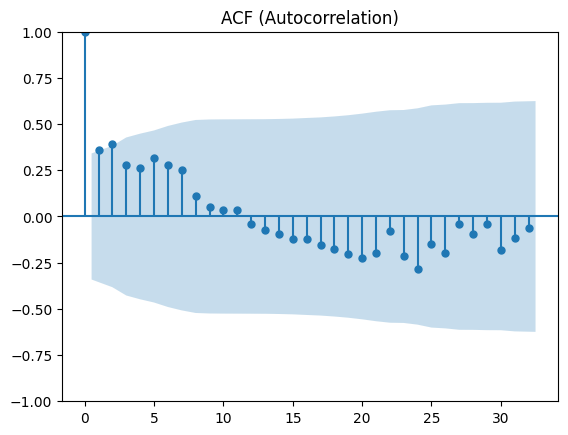

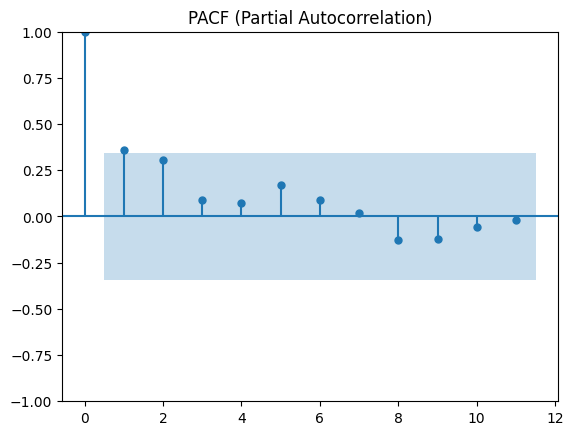

In [78]:
# 3. Pemilihan parameter ARIMA (p, d, q)
# Gunakan ACF dan PACF untuk menentukan nilai p dan q
plot_acf(df_diff, lags=32)
plt.title('ACF (Autocorrelation)')
plt.show()

plot_pacf(df_diff, lags=11)
plt.title('PACF (Partial Autocorrelation)')
plt.show()

* Berdasarkan grafik ACF dan PACF:
𝑝
=
1,
𝑞
=
1
atau
𝑞
=
2

* Parameter
𝑑
d harus ditentukan berdasarkan jumlah differencing yang diperlukan untuk membuat data stasioner.
* Data kemungkinan besar tidak memiliki seasonalitas, sehingga penggunaan ARIMA (bukan SARIMA) sudah memadai.

##Model ARIMA

Untuk menentukan nilai p, q, dan r kita harus melihat dulu korelasi data dan proses diffrencing sebelumnya.<br>
p : didapat dari pada urutan ke berapa lag data yang berada diluar interval di grafik PACF<br>
d : didapat dari jumlah proses diffrencing yang dilakukan sampai data stationer<br>
q : didapat dari urutan ke berapa lag data yang berada diluar interval di grafik ACF<br><br>

sehingga bisa didapatkan nilai :
p = 1, d = 1, q = 1 atau 2

In [79]:
p, d, q = 1, 1, 1

# 4. Pelatihan model ARIMA
model = ARIMA(df_pivot['GDP_R'], order=(p, d, q))
model_fit_1 = model.fit()

# Ringkasan model
print(model_fit_1.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  GDP_R   No. Observations:                   34
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -431.014
Date:                Fri, 29 Nov 2024   AIC                            868.029
Time:                        23:32:20   BIC                            872.518
Sample:                             0   HQIC                           869.539
                                 - 34                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.000   2741.447      0.000       0.999       1.001
ma.L1         -0.9998      0.068    -14.686      0.000      -1.133      -0.866
sigma2      6.211e+09   2.36e-12   2.63e+21      0.0

In [80]:
p, d, q = 1, 1, 2

# 4. Pelatihan model ARIMA
model = ARIMA(df_pivot['GDP_R'], order=(p, d, q))
model_fit_2 = model.fit()

# Ringkasan model
print(model_fit_2.summary())

                               SARIMAX Results                                
Dep. Variable:                  GDP_R   No. Observations:                   34
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -459.886
Date:                Fri, 29 Nov 2024   AIC                            927.772
Time:                        23:32:20   BIC                            933.758
Sample:                             0   HQIC                           929.786
                                 - 34                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7616      0.081     -9.365      0.000      -0.921      -0.602
ma.L1          0.7781      0.082      9.471      0.000       0.617       0.939
ma.L2          0.0707      0.012      5.783      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Usin

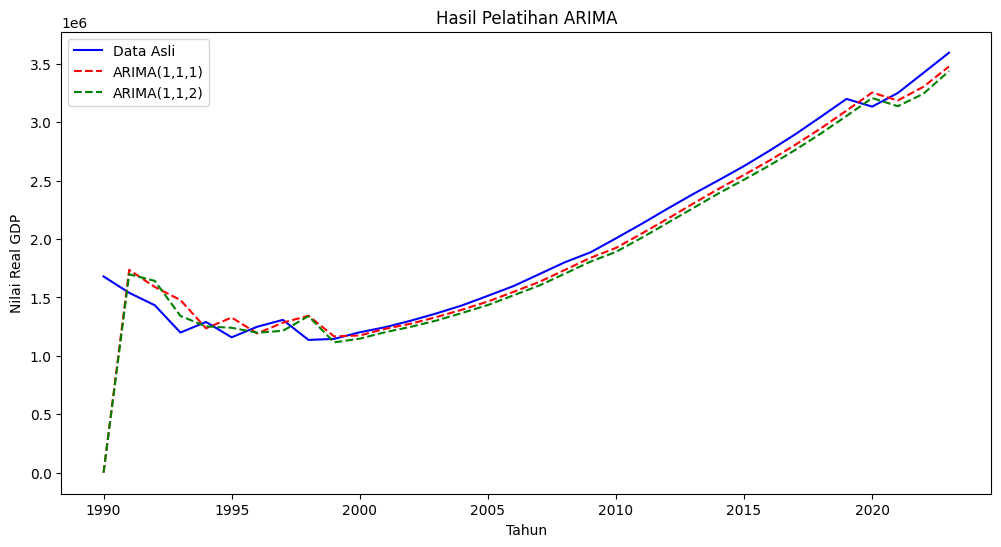

In [81]:
import matplotlib.pyplot as plt

# Asumsikan ts2 adalah DataFrame yang berisi data asli dan fitted values dari dua model
plt.figure(figsize=(12, 6))

# Plot data asli
plt.plot(df_pivot.index, df_pivot['GDP_R'], label='Data Asli', color='blue')

# Plot hasil pelatihan dari model ARIMA pertama
plt.plot(df_pivot.index, model_fit_1.fittedvalues, label='ARIMA(1,1,1)', linestyle='--', color='red')

# Plot hasil pelatihan dari model ARIMA kedua
plt.plot(df_pivot.index, model_fit_2.fittedvalues, label='ARIMA(1,1,2)', linestyle='--', color='green')

# Menambahkan detail ke plot
plt.title('Hasil Pelatihan ARIMA')
plt.xlabel('Tahun')
plt.ylabel('Nilai Real GDP')
plt.legend()
plt.show()


## Metrik Penilaian

In [82]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Data aktual (data asli)
actual =df_pivot['GDP_R']

# Data prediksi (hasil model)
predicted1 = model_fit_1.fittedvalues
predicted2 = model_fit_2.fittedvalues

# MAPE
mape = np.mean(np.abs((actual - predicted1) / actual)) * 100
print(f"Mean Absolute Percentage Error (MAPE) ARIMA(1,1,1): {mape:.2f}%")
mape = np.mean(np.abs((actual - predicted2) / actual)) * 100
print(f"Mean Absolute Percentage Error (MAPE) ARIMA(1,1,2): {mape:.2f}%")

# AIC dan BIC (dari model ARIMA)
print(f"AIC ARIMA(1,1,1) : {model_fit_1.aic}")
print(f"AIC ARIMA(1,1,2): {model_fit_2.aic}")
print(f"BIC ARIMA(1,1,2): {model_fit_1.bic}")
print(f"BIC ARIMA(1,1,2): {model_fit_2.bic}")

Mean Absolute Percentage Error (MAPE) ARIMA(1,1,1): 7.79%
Mean Absolute Percentage Error (MAPE) ARIMA(1,1,2): 8.52%
AIC ARIMA(1,1,1) : 868.0288329345408
AIC ARIMA(1,1,2): 927.7721250754536
BIC ARIMA(1,1,2): 872.5183556189402
BIC ARIMA(1,1,2): 933.7581553213195


Berdasarkan evaluasi keseluruhan menggunakan MAPE, AIC, dan BIC, model ARIMA(1,1,1) terbukti lebih baik dibandingkan dengan ARIMA(1,1,2) karena:

* Memiliki tingkat kesalahan prediksi yang lebih kecil (MAPE lebih rendah).
* Memiliki kecocokan model yang lebih baik (AIC lebih rendah).
* Lebih sederhana dengan penalti parameter yang lebih kecil (BIC lebih rendah).

## Predict

In [83]:
#Prediksi ke depan
forecast = model_fit_1.get_forecast(steps=5)
forecast_index = range(df_pivot.index[-1] + 1, df_pivot.index[-1] + 6)
forecast_values = forecast.predicted_mean
conf_int = forecast.conf_int()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


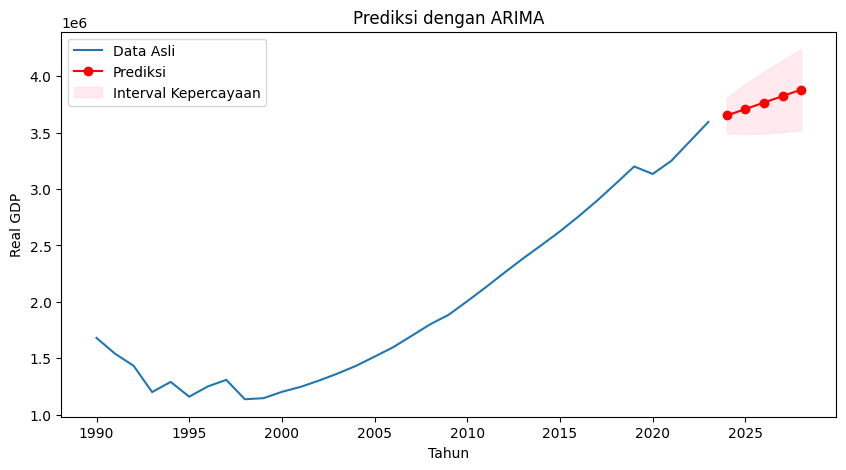

In [84]:
# Visualisasi prediksi
plt.figure(figsize=(10, 5))
plt.plot(df_pivot.index, df_pivot['GDP_R'], label='Data Asli')
plt.plot(forecast_index, forecast_values, marker='o', color='red', label='Prediksi')
plt.fill_between(forecast_index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3, label='Interval Kepercayaan')
plt.title('Prediksi dengan ARIMA')
plt.xlabel('Tahun')
plt.ylabel('Real GDP')
plt.legend()
plt.show()

In [85]:
last_year = df_pivot.index[-1]
future_years = pd.date_range(start=f'{last_year + 1}', periods=5, freq='YE')
forecast_df = forecast.summary_frame()
forecast_df['Year'] = future_years.year
print(forecast_df)

GDP_R          mean        mean_se  mean_ci_lower  mean_ci_upper  Year
34     3.652322e+06   79427.630449   3.496646e+06   3.807997e+06  2024
35     3.709477e+06  113203.220291   3.487603e+06   3.931352e+06  2025
36     3.766633e+06  139709.204953   3.492808e+06   4.040458e+06  2026
37     3.823789e+06  162541.770646   3.505213e+06   4.142365e+06  2027
38     3.880944e+06  183080.487723   3.522113e+06   4.239775e+06  2028


Setelah melakukan forecasting serta dilakukan visualisasi, data Real GDP akan mengalami peningkatan jika dilihat dari prediksi pola data sebelumnya.